In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from statsmodels.tsa.arima_model import ARIMA
from tidegauge_functions import read_GPS_SONEL, read_GPS_nam14_UNAVCO, calc_rolling_decomposition_GPS

%matplotlib inline

In [2]:
# Establish Components of file patern for UNAVCO Data
datum = '????'
ext = '.csv'
meth = '.cwu.nam14'
dir_in = 'data/GPS'

In [3]:
# Join File pattern components
pattern = os.path.join(dir_in, datum + meth + ext)
print(pattern)

data/GPS\????.cwu.nam14.csv


In [4]:
# Sort files using glob
filenames = sorted(glob.glob(pattern))

In [5]:
# Call all files and view them using 'head'
for f, filepath in enumerate(filenames):
    df = read_GPS_nam14_UNAVCO(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\ASKY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-20   0.00  0.00      0.00      2.00     1.53         9.87   repro
2007-08-21   1.82 -0.63     -2.30      2.02     1.53         9.82   repro
2007-08-22  -0.98  0.33     -3.36      2.01     1.54         9.82   repro
2007-08-23  -0.35 -1.54     -4.23      1.97     1.51         9.60   repro
2007-08-24  -0.76 -1.11     -1.18      2.05     1.57        10.15   repro


data/GPS\BLAS.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2008-07-08   0.00  0.00      0.00      1.91     1.59        10.91   repro
2008-07-09   0.30  0.73     -8.95      1.93     1.59        11.11   repro
2008-07-10   1.84 -0.15    -13.82      2.03     1.70        11.66   repro
2008-07-11  -0.48  0.64    -16.57      1.99     1.60



data/GPS\KUAQ.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2009-08-07   0.00  0.00      0.00      2.37     1.68         8.97   repro
2009-08-08  -0.52 -0.12     -0.05      2.27     1.57         8.41   repro
2009-08-09   1.54 -0.63      4.69      2.29     1.61         8.57   repro
2009-08-10   0.22 -0.99      5.74      2.22     1.56         8.33   repro
2009-08-11   2.25 -0.15      5.26      2.28     1.59         8.50   repro


data/GPS\KULL.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-15   0.00  0.00      0.00      2.17     1.63        10.35   repro
2007-08-16  -1.20 -0.40     -9.86      2.11     1.59         9.85   repro
2007-08-17  -0.38 -1.15     -5.59      2.09     1.58         9.68   repro
2007-08-18   0.99 -0.50     -0.62      2.10     1.57

In [12]:
# Resample data to monthly
def monthly_averaging(df, site):
    
    df_monthly = df.dropna().resample('1M').mean()
    df_monthly.plot()
    plt.suptitle(f"{site} Monthly GPS Data")
    plt.show()
    
    return df_monthly

In [30]:
def SARIMAX_GPS_Monthly(df, var, site, steps, start, end, frequency):
    #Convert Data to monthly
    df_monthly = df.dropna().resample('1M').mean()
    #Create SARIMAX Model
    mod = sm.tsa.statespace.SARIMAX(df_monthly[var].interpolate(), 
                                                        trend='n',
                                                        order=(0,1,0),
                                                        seasonal_order=(1,1,1,12))
    results_SARIMAX = mod.fit()
    
    # Getting 120 months
    SARIMAX_forecast = round(results_SARIMAX.forecast(steps), 2)
 
    # Creating an index
    idx = pd.date_range(start, end, freq=frequency)
 
    SARIMAX_forecast = pd.DataFrame(list(zip(list(idx),list(SARIMAX_forecast))),
                                    columns=['Date','ForecastSSH']).set_index('Date')
    print(f'{site}')
    print(results_SARIMAX.summary())
    df_monthly.plot()
    plt.suptitle(f"{site} Monthly GPS Data")
    plt.savefig(f'figs/monthly_GPS_all_data_{site}.png')
    plt.show()
    plt.plot(df[var].dropna(), linestyle='', marker=',')
    plt.plot(results_SARIMAX.fittedvalues, color='red') 
    plt.suptitle(f"{site} SARIMAX Model GPS")
    plt.savefig(f'figs/test_SARIMAX_MODEL_GPS_{site}.png')
    plt.show()
    plt.plot(df[var].dropna(), color='black', marker=',', linestyle='', label='Data')
    plt.plot(results_SARIMAX.fittedvalues, color='red', label='SARIMAX model') 
    plt.plot(SARIMAX_forecast.ForecastSSH, color='blue', label='Forecast') 
    plt.suptitle(f'{site} SARIMAX GPS Forecast {start} to {end}')
    plt.ylabel('Vertical Land Motion [mm]')
    plt.legend()
    plt.savefig(f'figs/test_GPS_SARIMAX_forecast_{site}.png')

ASKY
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -409.058
Date:                              Fri, 24 Jul 2020   AIC                            824.115
Time:                                      12:11:26   BIC                            832.983
Sample:                                  08-31-2007   HQIC                           827.719
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0099      0.110      0.090      0.928      -0.206       0.226
ma.S.L12      

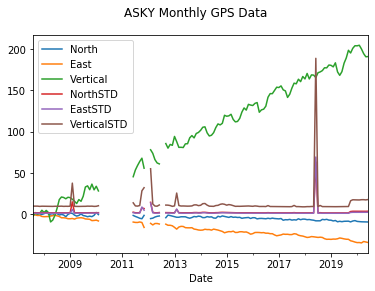

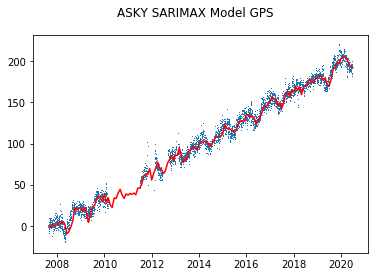

BLAS
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -384.676
Date:                              Fri, 24 Jul 2020   AIC                            775.351
Time:                                      12:11:27   BIC                            783.977
Sample:                                  07-31-2008   HQIC                           778.856
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0954      0.127      0.752      0.452      -0.153       0.344
ma.S.L12      

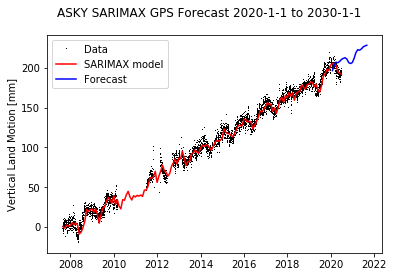

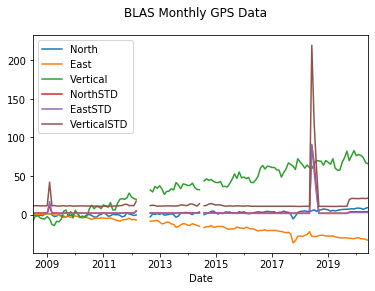

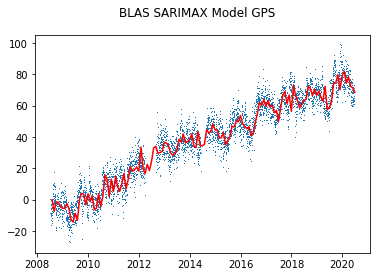

DGJG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -340.770
Date:                              Fri, 24 Jul 2020   AIC                            687.540
Time:                                      12:11:29   BIC                            695.852
Sample:                                  08-31-2009   HQIC                           690.915
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1086      0.111     -0.981      0.327      -0.326       0.108
ma.S.L12      

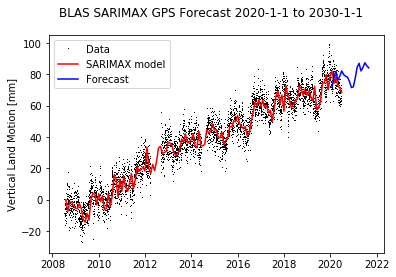

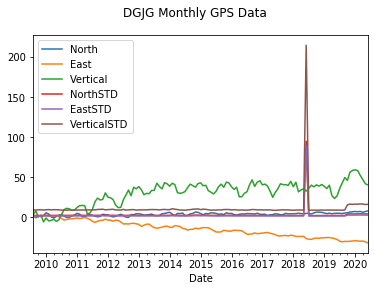

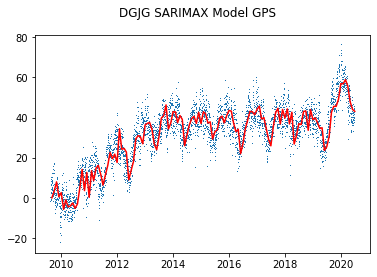

DKSG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -408.918
Date:                              Fri, 24 Jul 2020   AIC                            823.836
Time:                                      12:11:30   BIC                            832.703
Sample:                                  08-31-2007   HQIC                           827.439
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0617      0.123      0.502      0.616      -0.179       0.303
ma.S.L12      

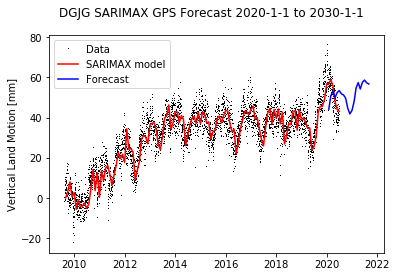

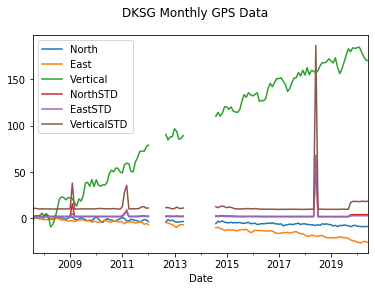

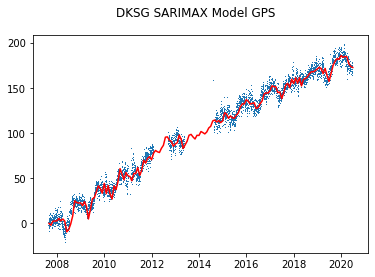

GMMA
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -367.746
Date:                              Fri, 24 Jul 2020   AIC                            741.493
Time:                                      12:11:31   BIC                            749.805
Sample:                                  08-31-2009   HQIC                           744.868
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1257      0.202      0.621      0.535      -0.271       0.522
ma.S.L12      

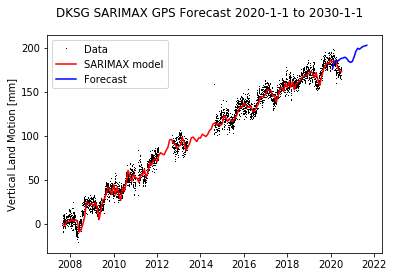

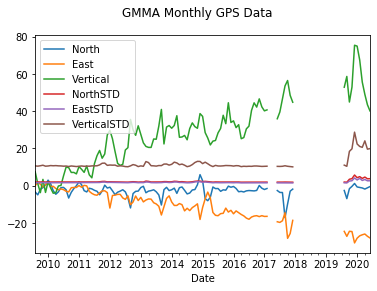

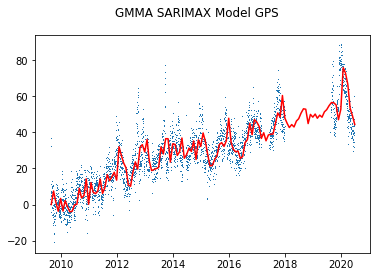

GROK
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -398.164
Date:                              Fri, 24 Jul 2020   AIC                            802.327
Time:                                      12:11:33   BIC                            810.953
Sample:                                  07-31-2008   HQIC                           805.832
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1012      0.104      0.974      0.330      -0.102       0.305
ma.S.L12      

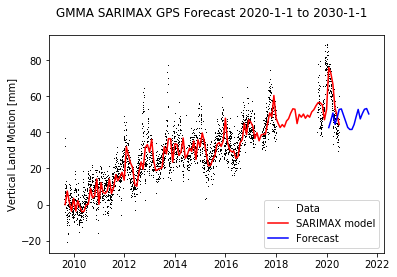

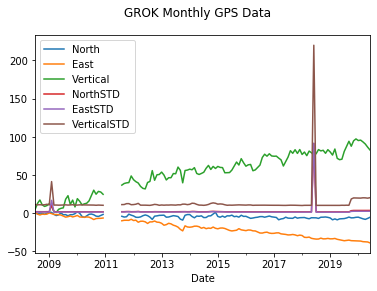

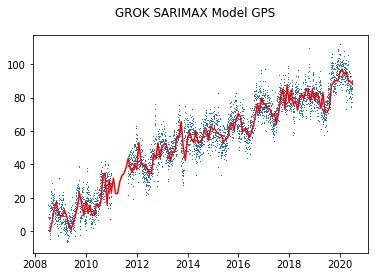

HEL2
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  150
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -434.253
Date:                              Fri, 24 Jul 2020   AIC                            874.505
Time:                                      12:11:34   BIC                            883.265
Sample:                                  08-31-2007   HQIC                           878.065
                                       - 01-31-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1121      0.107      1.044      0.296      -0.098       0.322
ma.S.L12      

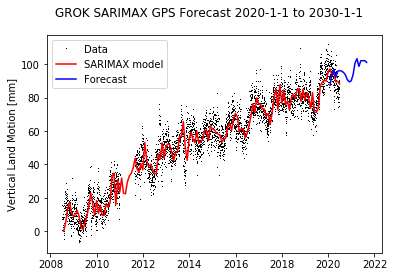

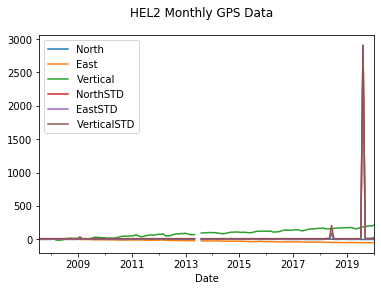

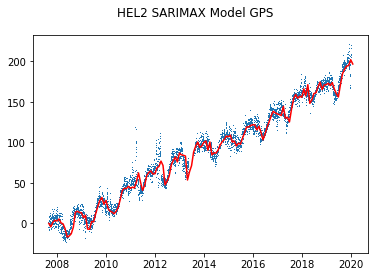

HJOR
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -392.275
Date:                              Fri, 24 Jul 2020   AIC                            790.550
Time:                                      12:11:35   BIC                            799.418
Sample:                                  08-31-2007   HQIC                           794.154
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0685      0.134     -0.512      0.609      -0.331       0.194
ma.S.L12      

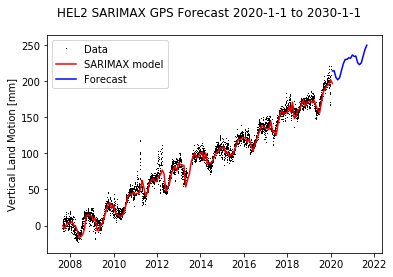

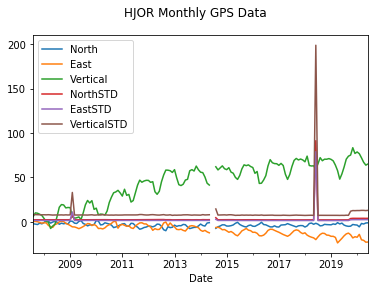

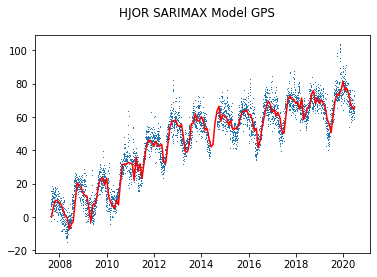

HMBG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -339.085
Date:                              Fri, 24 Jul 2020   AIC                            684.169
Time:                                      12:11:36   BIC                            692.481
Sample:                                  08-31-2009   HQIC                           687.544
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1168      0.114     -1.021      0.307      -0.341       0.107
ma.S.L12      

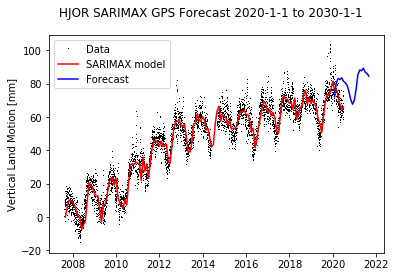

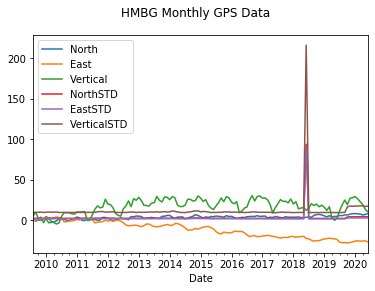

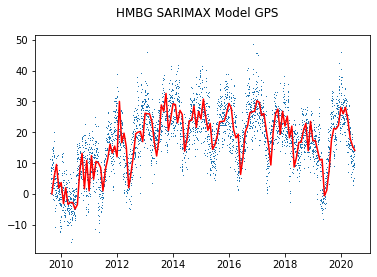

HRDG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -386.525
Date:                              Fri, 24 Jul 2020   AIC                            779.050
Time:                                      12:11:37   BIC                            787.676
Sample:                                  07-31-2008   HQIC                           782.555
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0869      0.125      0.697      0.486      -0.158       0.331
ma.S.L12      

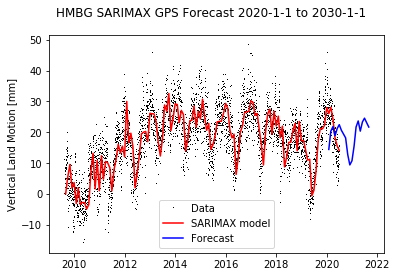

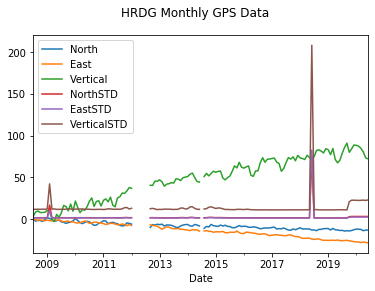

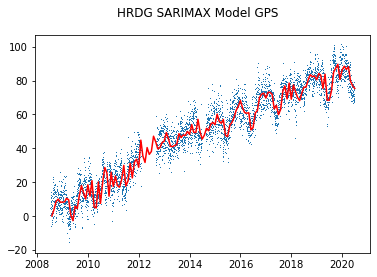

JGBL
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -392.925
Date:                              Fri, 24 Jul 2020   AIC                            791.850
Time:                                      12:11:38   BIC                            800.476
Sample:                                  07-31-2008   HQIC                           795.355
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1453      0.132      1.102      0.270      -0.113       0.404
ma.S.L12      

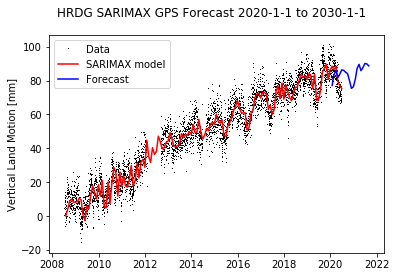

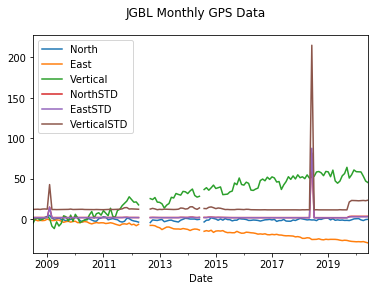

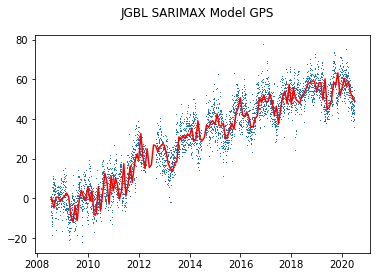

JWLF
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -393.047
Date:                              Fri, 24 Jul 2020   AIC                            792.093
Time:                                      12:11:39   BIC                            800.719
Sample:                                  07-31-2008   HQIC                           795.598
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1237      0.158      0.782      0.434      -0.186       0.434
ma.S.L12      

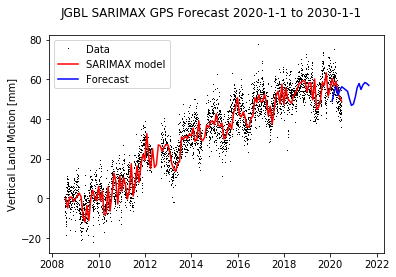

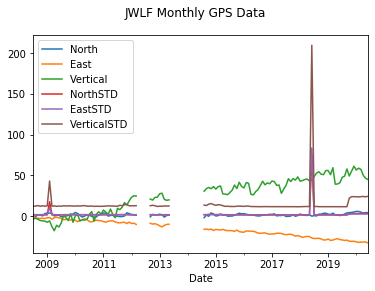

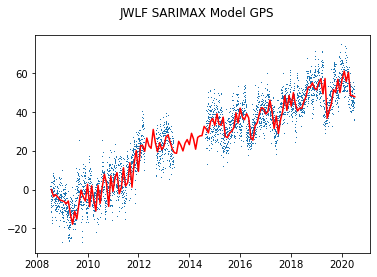

KAGA
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  170
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -522.495
Date:                              Fri, 24 Jul 2020   AIC                           1050.990
Time:                                      12:11:40   BIC                           1060.159
Sample:                                  05-31-2006   HQIC                          1054.714
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0198      0.099     -0.201      0.841      -0.213       0.173
ma.S.L12      

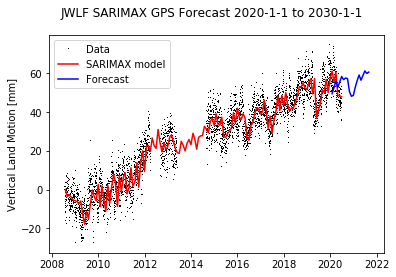

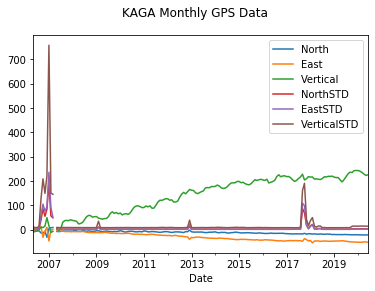

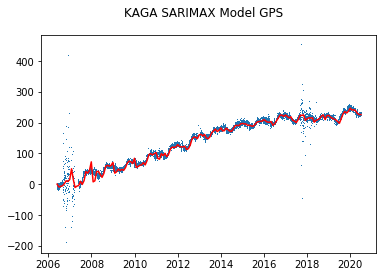

KAGZ
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -407.092
Date:                              Fri, 24 Jul 2020   AIC                            820.183
Time:                                      12:11:42   BIC                            829.050
Sample:                                  08-31-2007   HQIC                           823.786
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0819      0.097     -0.848      0.396      -0.271       0.107
ma.S.L12      

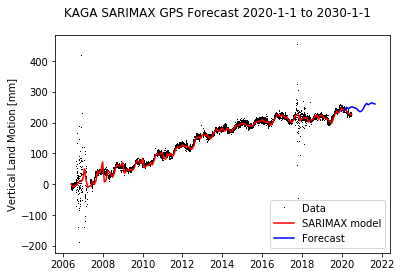

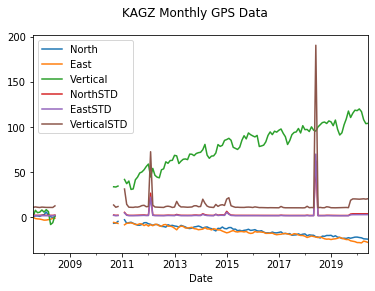

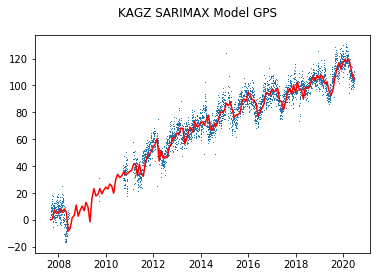

KBUG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -426.662
Date:                              Fri, 24 Jul 2020   AIC                            859.324
Time:                                      12:11:43   BIC                            868.192
Sample:                                  08-31-2007   HQIC                           862.928
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0845      0.119     -0.708      0.479      -0.318       0.149
ma.S.L12      

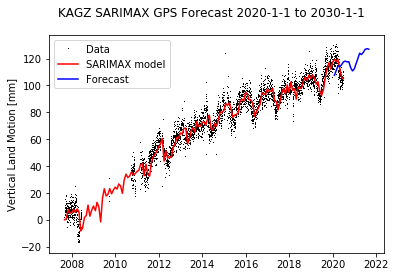

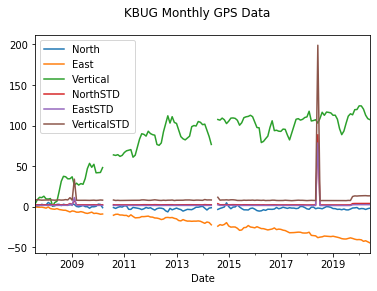

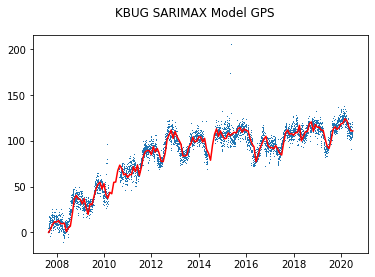

KMJP
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -394.435
Date:                              Fri, 24 Jul 2020   AIC                            794.870
Time:                                      12:11:43   BIC                            803.496
Sample:                                  07-31-2008   HQIC                           798.375
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2628      0.162      1.626      0.104      -0.054       0.580
ma.S.L12      

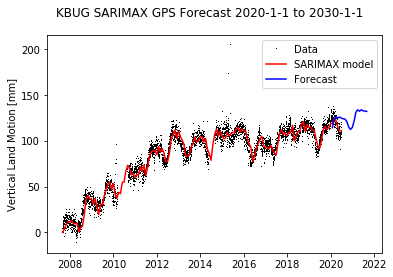

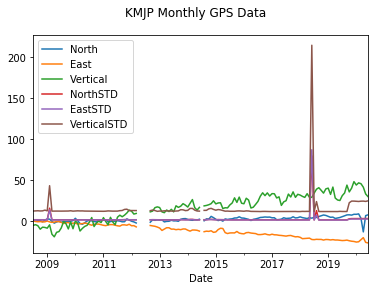

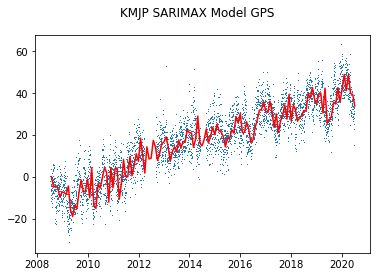

KMOR
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  154
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -450.239
Date:                              Fri, 24 Jul 2020   AIC                            906.479
Time:                                      12:11:45   BIC                            915.325
Sample:                                  09-30-2007   HQIC                           910.074
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0869      0.123      0.706      0.480      -0.155       0.328
ma.S.L12      

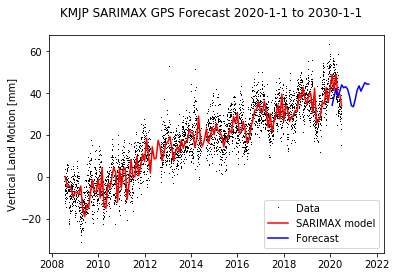

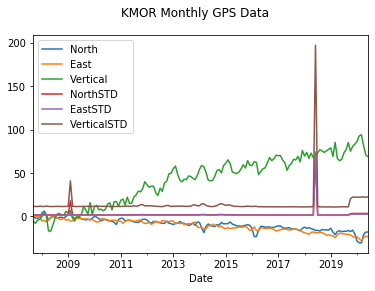

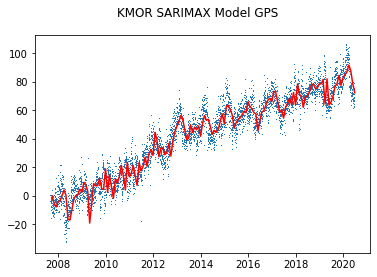

KSNB
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -414.629
Date:                              Fri, 24 Jul 2020   AIC                            835.257
Time:                                      12:11:46   BIC                            844.125
Sample:                                  08-31-2007   HQIC                           838.860
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0327      0.122     -0.267      0.789      -0.272       0.207
ma.S.L12      

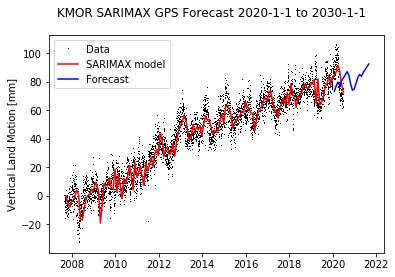

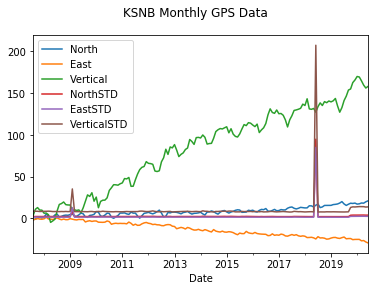

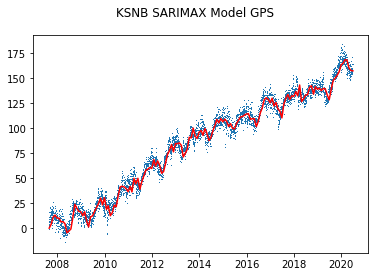

KUAQ
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -349.964
Date:                              Fri, 24 Jul 2020   AIC                            705.929
Time:                                      12:11:47   BIC                            714.241
Sample:                                  08-31-2009   HQIC                           709.303
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0787      0.167      0.470      0.638      -0.249       0.406
ma.S.L12      

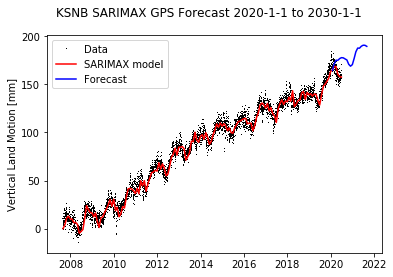

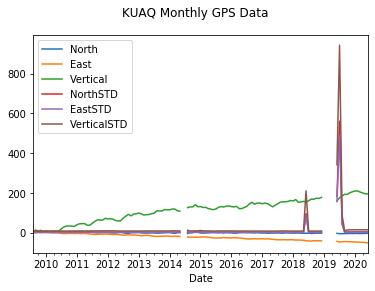

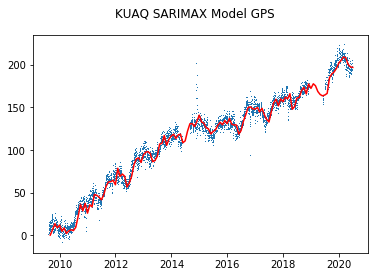

KULL
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  142
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -366.667
Date:                              Fri, 24 Jul 2020   AIC                            739.334
Time:                                      12:11:49   BIC                            747.913
Sample:                                  08-31-2007   HQIC                           742.820
                                       - 05-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0728      0.123      0.592      0.554      -0.168       0.314
ma.S.L12      

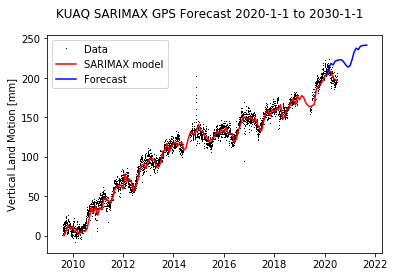

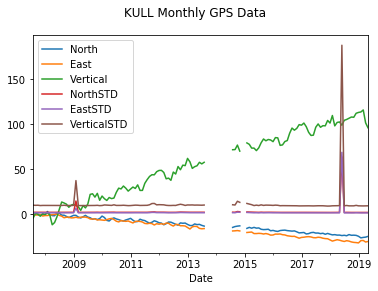

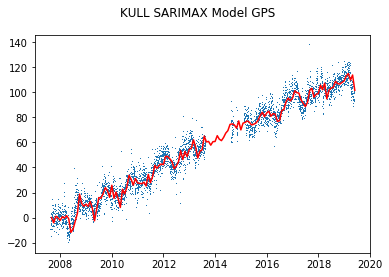

KULU
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  278
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -742.850
Date:                              Fri, 24 Jul 2020   AIC                           1491.699
Time:                                      12:11:50   BIC                           1502.438
Sample:                                  07-31-1996   HQIC                          1496.014
                                       - 08-31-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0441      0.085      0.516      0.606      -0.123       0.211
ma.S.L12      

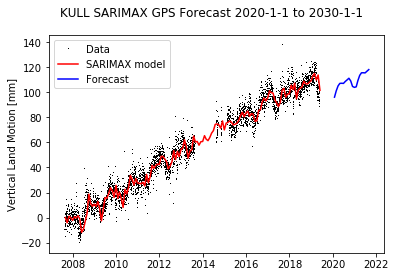

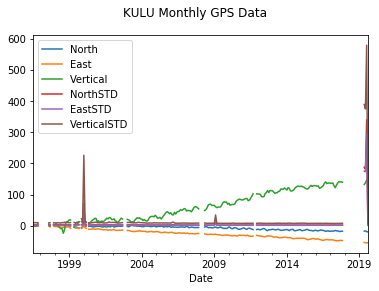

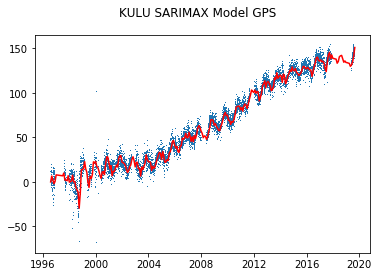

LBIB
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -338.330
Date:                              Fri, 24 Jul 2020   AIC                            682.660
Time:                                      12:11:51   BIC                            690.972
Sample:                                  08-31-2009   HQIC                           686.035
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0327      0.133     -0.247      0.805      -0.293       0.227
ma.S.L12      

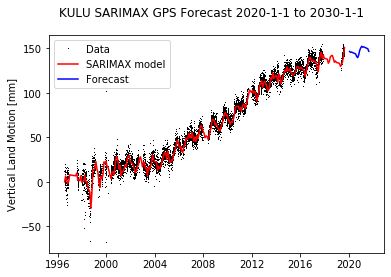

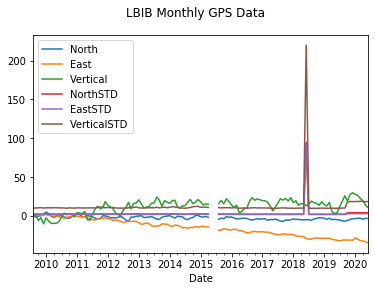

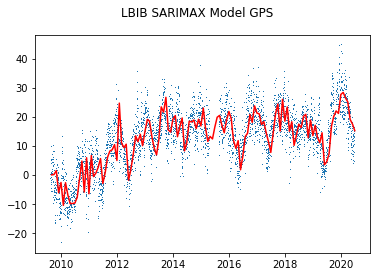

LEFN
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -376.856
Date:                              Fri, 24 Jul 2020   AIC                            759.712
Time:                                      12:11:52   BIC                            768.338
Sample:                                  07-31-2008   HQIC                           763.217
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1643      0.113      1.457      0.145      -0.057       0.385
ma.S.L12      

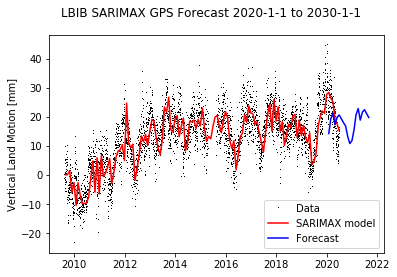

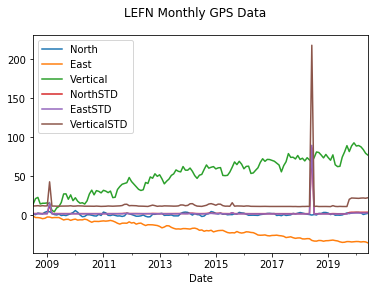

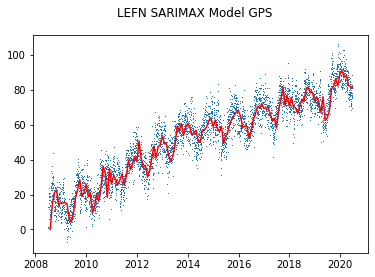

LYNS
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -399.735
Date:                              Fri, 24 Jul 2020   AIC                            805.470
Time:                                      12:11:53   BIC                            814.338
Sample:                                  08-31-2007   HQIC                           809.074
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2502      0.131      1.904      0.057      -0.007       0.508
ma.S.L12      

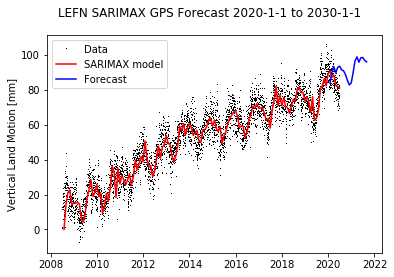

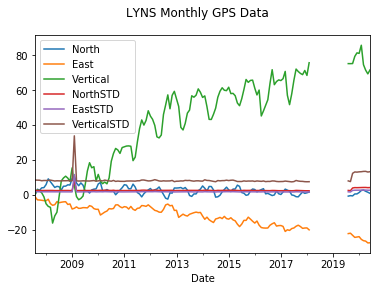

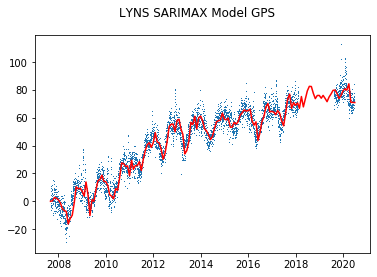

MARG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -402.168
Date:                              Fri, 24 Jul 2020   AIC                            810.337
Time:                                      12:11:54   BIC                            819.204
Sample:                                  08-31-2007   HQIC                           813.940
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0466      0.112      0.414      0.679      -0.174       0.267
ma.S.L12      

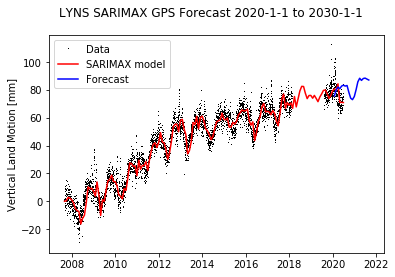

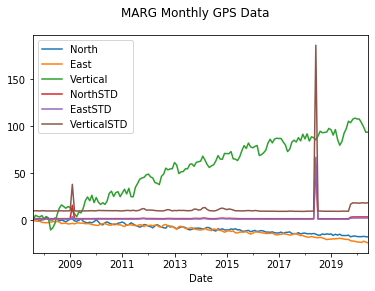

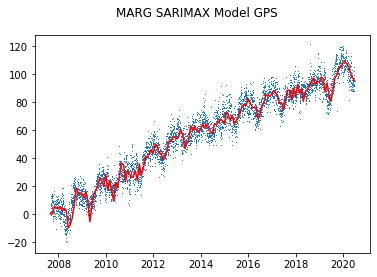

MIK2
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -357.310
Date:                              Fri, 24 Jul 2020   AIC                            720.619
Time:                                      12:11:55   BIC                            728.932
Sample:                                  08-31-2009   HQIC                           723.994
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3101      0.131     -2.363      0.018      -0.567      -0.053
ma.S.L12      

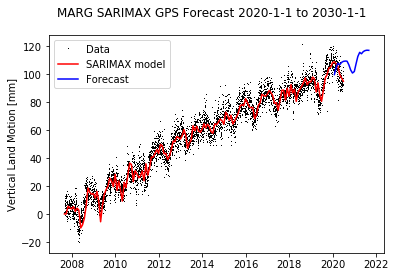

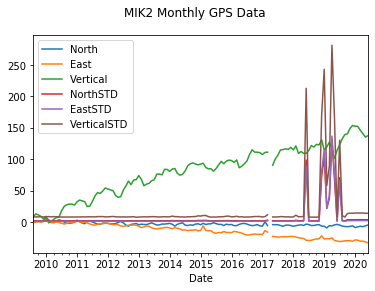

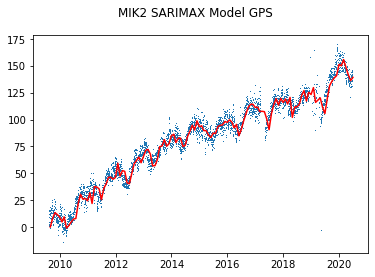

MSVG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -340.798
Date:                              Fri, 24 Jul 2020   AIC                            687.597
Time:                                      12:11:56   BIC                            695.909
Sample:                                  08-31-2009   HQIC                           690.972
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1065      0.128     -0.829      0.407      -0.358       0.145
ma.S.L12      

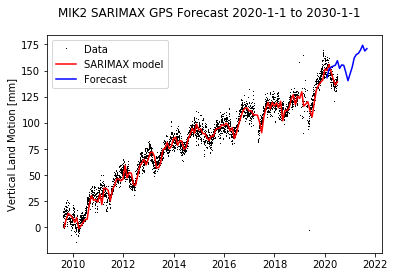

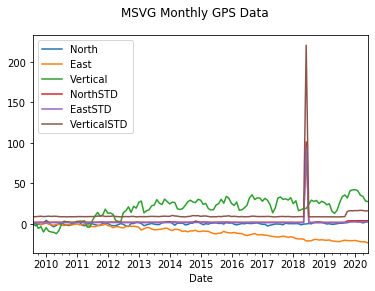

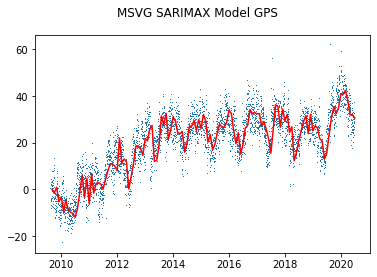

NNVN
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -422.052
Date:                              Fri, 24 Jul 2020   AIC                            850.103
Time:                                      12:11:57   BIC                            858.971
Sample:                                  08-31-2007   HQIC                           853.707
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1098      0.128      0.857      0.391      -0.141       0.361
ma.S.L12      

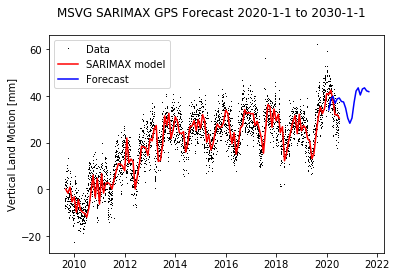

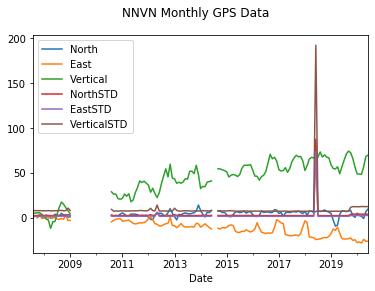

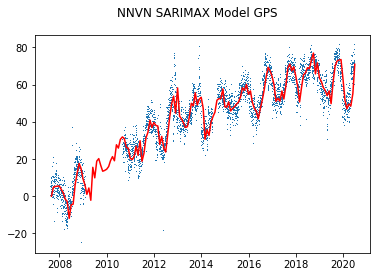

NRSK
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -409.391
Date:                              Fri, 24 Jul 2020   AIC                            824.782
Time:                                      12:11:58   BIC                            833.407
Sample:                                  07-31-2008   HQIC                           828.287
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0148      0.123      0.120      0.905      -0.227       0.257
ma.S.L12      

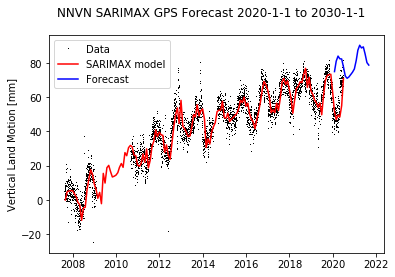

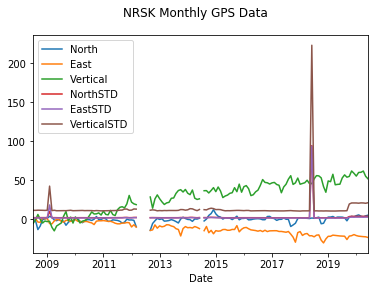

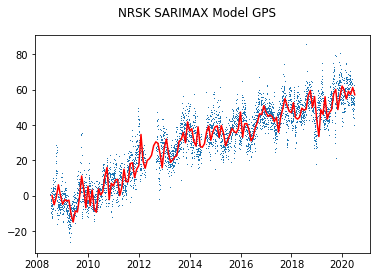

PLPK
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -438.043
Date:                              Fri, 24 Jul 2020   AIC                            882.086
Time:                                      12:11:59   BIC                            890.954
Sample:                                  08-31-2007   HQIC                           885.690
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0703      0.119     -0.590      0.555      -0.304       0.163
ma.S.L12      

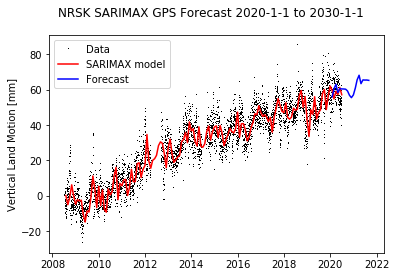

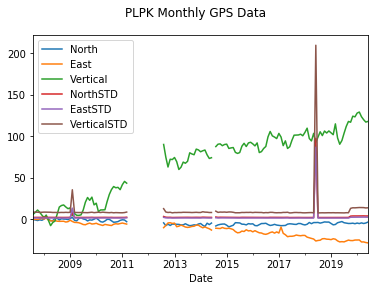

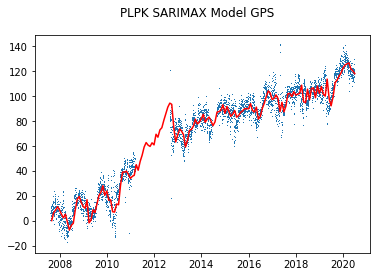

QAAR
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -444.438
Date:                              Fri, 24 Jul 2020   AIC                            894.876
Time:                                      12:12:00   BIC                            903.743
Sample:                                  08-31-2007   HQIC                           898.479
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0040      0.098      0.041      0.967      -0.189       0.197
ma.S.L12      

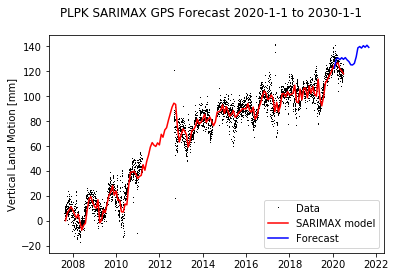

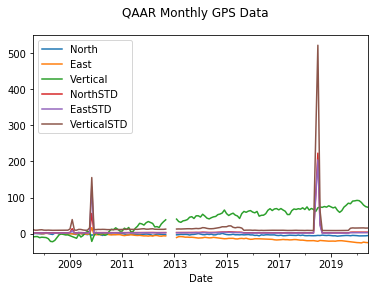

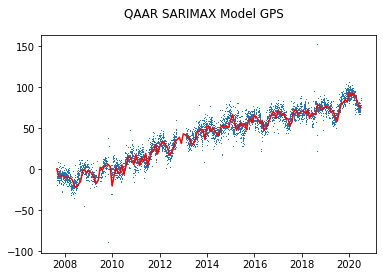

RINK
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -406.261
Date:                              Fri, 24 Jul 2020   AIC                            818.521
Time:                                      12:12:02   BIC                            827.389
Sample:                                  08-31-2007   HQIC                           822.125
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0118      0.126      0.093      0.926      -0.235       0.259
ma.S.L12      

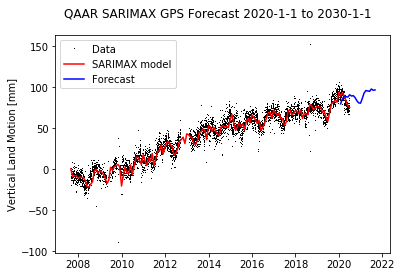

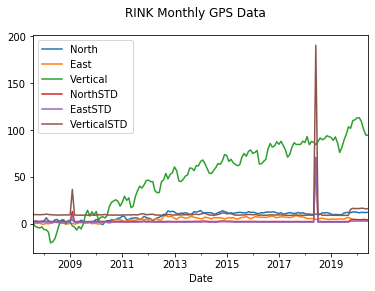

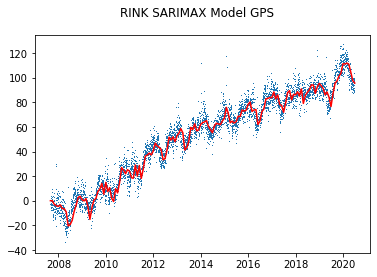

SCBY
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  154
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -521.332
Date:                              Fri, 24 Jul 2020   AIC                           1048.664
Time:                                      12:12:03   BIC                           1057.510
Sample:                                  09-30-2007   HQIC                          1052.259
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0046      0.167     -0.027      0.978      -0.332       0.323
ma.S.L12      

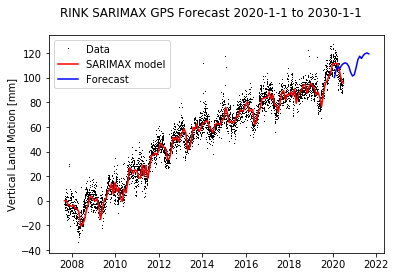

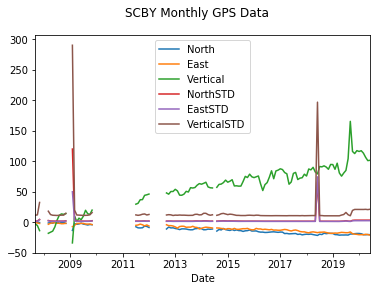

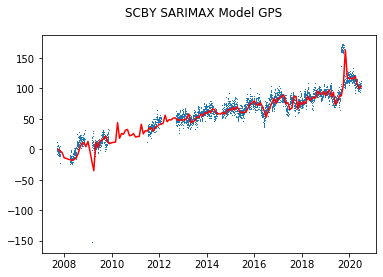

SENU
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  139
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -362.558
Date:                              Fri, 24 Jul 2020   AIC                            731.116
Time:                                      12:12:04   BIC                            739.624
Sample:                                  05-31-2008   HQIC                           734.572
                                       - 11-30-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1191      0.163     -0.732      0.464      -0.438       0.200
ma.S.L12      

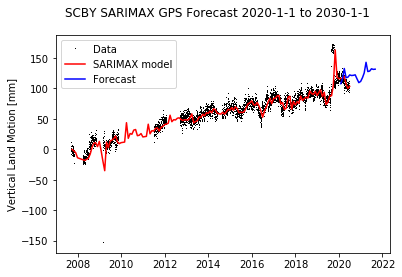

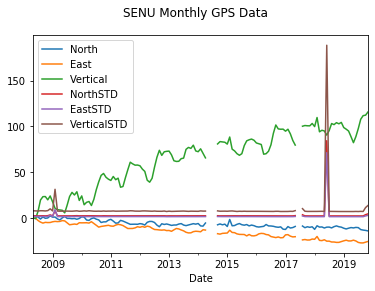

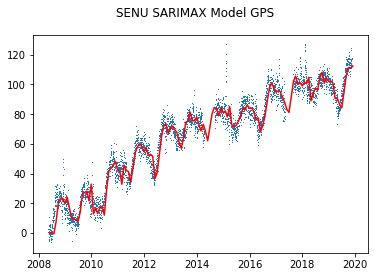

SRMP
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -408.757
Date:                              Fri, 24 Jul 2020   AIC                            823.514
Time:                                      12:12:05   BIC                            832.382
Sample:                                  08-31-2007   HQIC                           827.118
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0115      0.113      0.101      0.919      -0.211       0.234
ma.S.L12      

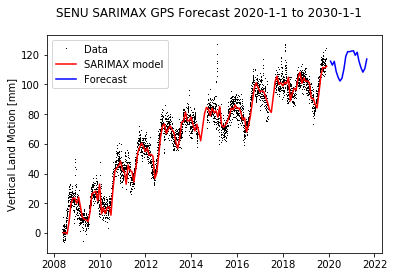

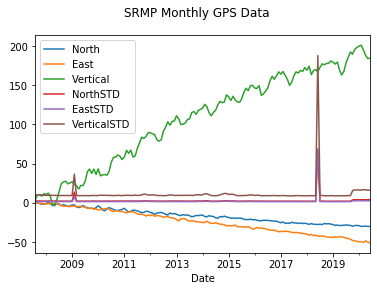

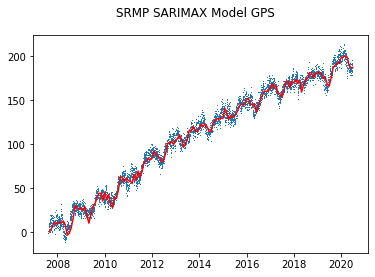

TIMM
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -600.397
Date:                              Fri, 24 Jul 2020   AIC                           1206.794
Time:                                      12:12:06   BIC                           1215.661
Sample:                                  08-31-2007   HQIC                          1210.397
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2551      0.066     -3.849      0.000      -0.385      -0.125
ma.S.L12      

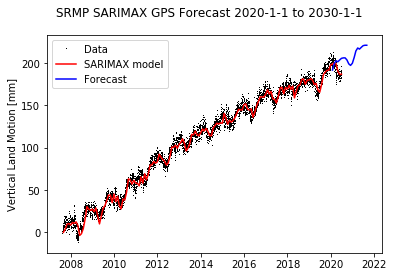

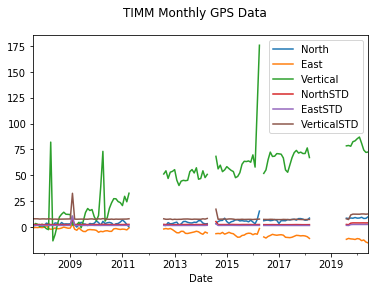

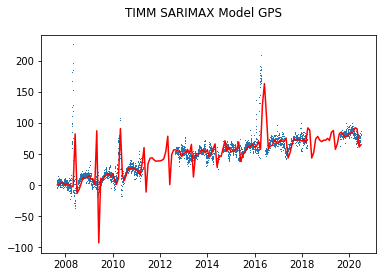

TREO
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  154
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -423.644
Date:                              Fri, 24 Jul 2020   AIC                            853.289
Time:                                      12:12:07   BIC                            862.135
Sample:                                  09-30-2007   HQIC                           856.884
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0345      0.134     -0.258      0.796      -0.297       0.228
ma.S.L12      

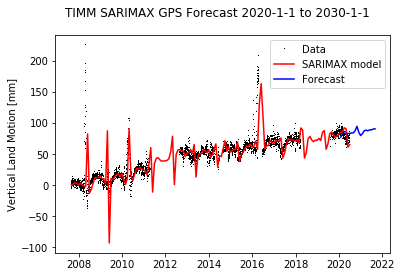

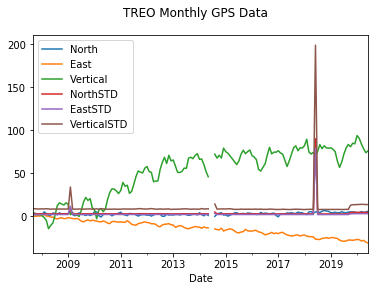

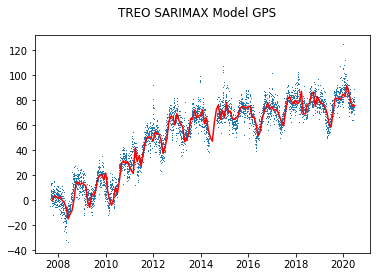

UTMG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  155
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -381.232
Date:                              Fri, 24 Jul 2020   AIC                            768.464
Time:                                      12:12:08   BIC                            777.332
Sample:                                  08-31-2007   HQIC                           772.068
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0217      0.116      0.186      0.852      -0.207       0.250
ma.S.L12      

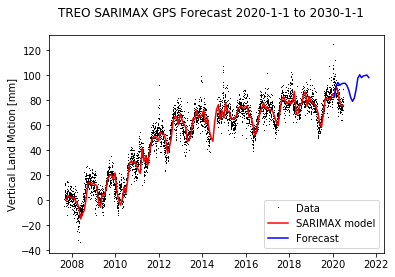

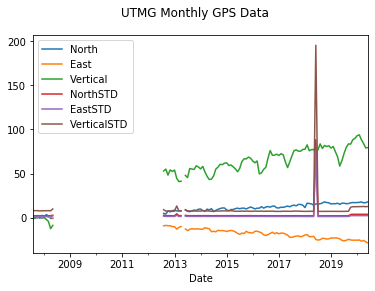

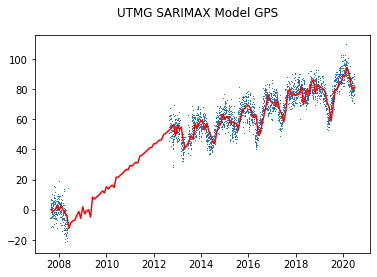

VFDG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -349.360
Date:                              Fri, 24 Jul 2020   AIC                            704.720
Time:                                      12:12:09   BIC                            713.032
Sample:                                  08-31-2009   HQIC                           708.095
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2296      0.124     -1.852      0.064      -0.473       0.013
ma.S.L12      

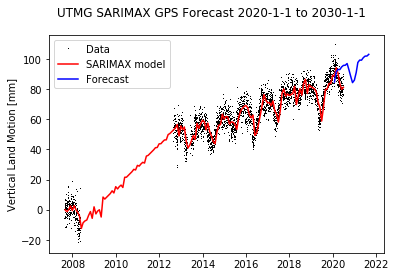

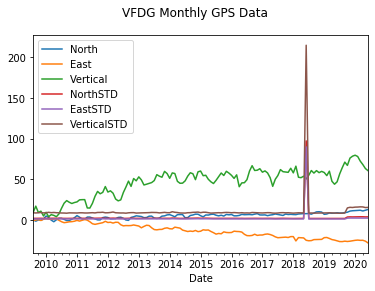

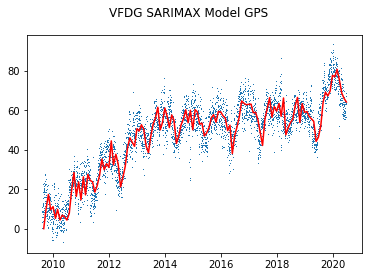

WTHG
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -337.997
Date:                              Fri, 24 Jul 2020   AIC                            681.994
Time:                                      12:12:10   BIC                            690.306
Sample:                                  08-31-2009   HQIC                           685.369
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0559      0.115     -0.484      0.628      -0.282       0.170
ma.S.L12      

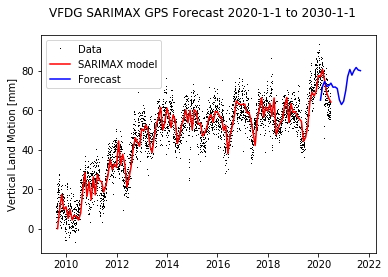

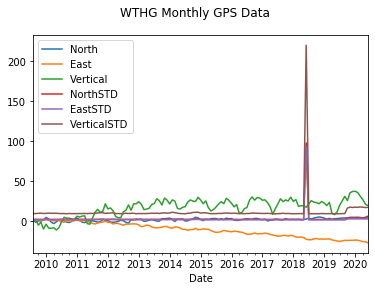

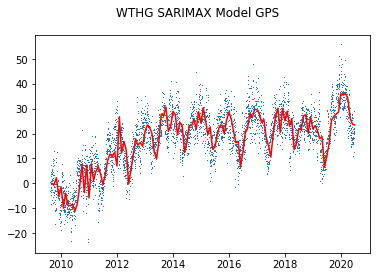

YMER
                                      SARIMAX Results                                       
Dep. Variable:                             Vertical   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -370.848
Date:                              Fri, 24 Jul 2020   AIC                            747.697
Time:                                      12:12:11   BIC                            756.009
Sample:                                  08-31-2009   HQIC                           751.072
                                       - 06-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1583      0.120     -1.319      0.187      -0.393       0.077
ma.S.L12      

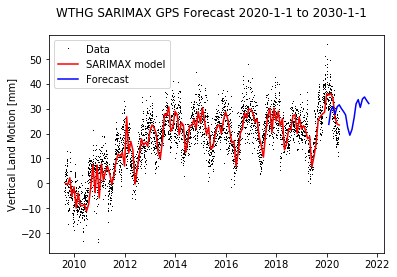

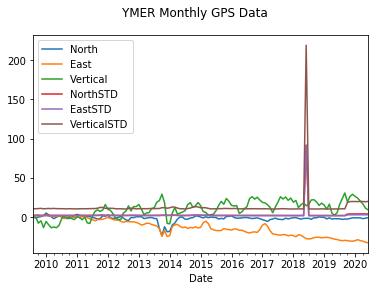

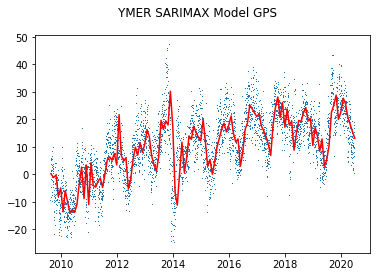

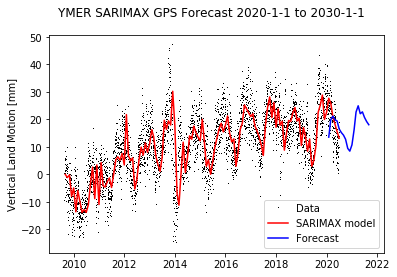

In [31]:
for f, filepath in enumerate(filenames):
    df = read_GPS_nam14_UNAVCO(filepath)
    SARIMAX_GPS_Monthly(df, 'Vertical', filepath[-18:-14], 20, '2020-1-1', '2030-1-1', 'M')

NameError: name 'results_SARIMAX' is not defined